# Graph Analysis
### Dijkstra's algorithm
**Dijkstra algorithm** (**BFS**) is a **greedy** algorithm that finds the shortest path between nodes in a graph with non-negative edge weights.
- Dijkstra's algorithm does not work if there are negative weights in the graph.

We may express Dijkstra's algorithm for a given **graph** and **source** as:

1. **Initialize:**
- Create a distance array dist[]. Set distance to **source** = 0, all others = ∞.
- Create a priority queue (min-heap) and insert **(0, source)**.
- Keep a prev[] array to reconstruct paths (optional).

2. **While** the priority queue is not empty:
- Extract the node u with the smallest current distance.
- Skip if this distance is outdated (greater than known distance dist[u]).
- For each neighbor v of u:
  - Compute alternative distance alt = dist[u] + weight(u, v)
  - If alt < dist[v], update:
  -  dist[v] = alt
  -  prev[v] = u
  -  Push (alt, v) into the priority queue.

3. **Result:**
- dist[] contains shortest distances from **source**.
- Use prev[] to reconstruct shortest paths.

<hr>

Some key points about Dijkstra's algorithm for a graph $G=(V,E)$:
- **Time Complexity:** Efficient with O((|V|+|E|) log |V|) using proper data structures
- **Space complexity:** Linear in graph size O(|V| + |E|)
- **Optimality:** Guarantees shortest paths with non-negative weights
- **Completeness:** Always finds a solution if one exists in finite graphs

**Reminder:** **Completeness** in search algorithms refers to whether the algorithm is guaranteed to find a solution if one exists.

<hr>

In the following, we implement the Dijkstra's algorithm wiht a min-heap as a priority queue. Then, we use if for a simple graph and find all shortest paths from a start node. We also use **NetworkX** to display the simple graph used in the example. As a bonus, we use Dijktra's algorithm to find the path with strongest friendship between two users in a social network. 

https://github.com/ostad-ai/Graph-Analysis
<br>Explanation in English :https://www.pinterest.com/HamedShahHosseini/graph-analysis/

In [1]:
# import required modules
import heapq
from collections import defaultdict

# Import this to display graphs
import networkx as nx

In [2]:
# Define Dijkstra returning shortest distances from start to all nodes
# and also sending the previous nodes
def dijkstra_with_path(graph, start, end=None):
    distances = defaultdict(lambda: float('inf'))
    distances[start] = 0
    previous = {}  # To reconstruct the path
    pq = [(0, start)]
    
    while pq:
        current_dist, u = heapq.heappop(pq)
        
        # Skip outdated entries
        if current_dist > distances[u]:
            continue
        
        # Optional: stop early when reaching the target
        if u == end:
            break
        
        for v, weight in graph.get(u, []):
            new_dist = current_dist + weight
            if new_dist < distances[v]:
                distances[v] = new_dist
                previous[v] = u
                heapq.heappush(pq, (new_dist, v))
    
    return dict(distances), previous

In [3]:
def get_path(previous, start, end):
    """Reconstruct path from start to end."""

    # Handle case where end wasn't reached
    if end not in previous and end != start:
        return None
    path = []
    current = end
    while current is not None:
        path.append(current)
        if current == start:
            break
        # Returns None if not found
        current = previous.get(current)
    else:
        return None  # No valid path
    # Reverse to get start → end
    return path[::-1]

In [4]:
# Example usage with path
graph = {
    'A': [('B', 6), ('C', 1)],
    'B': [('D', 5)],
    'C': [('B', 2), ('D', 1)],
    'D': []
}
start='A'
distances, prev = dijkstra_with_path(graph, start)
print(f'Distances from {start}: {distances}')         
print('-'*50)
for end in graph:
    path = get_path(prev, start, end)
    if path:
        print(f'Shortest path from {start} to {end}: ', ' → '.join(path))

Distances from A: {'A': 0, 'B': 3, 'C': 1, 'D': 2}
--------------------------------------------------
Shortest path from A to A:  A
Shortest path from A to B:  A → C → B
Shortest path from A to C:  A → C
Shortest path from A to D:  A → C → D


<hr style="height:3px; background-color:lightblue">

We display the graph used in the example above by **NetworkX**.

In [5]:
# Extra, a function to convert your graph to Networkx style,
# introduced in an earlier post
def convert_to_networkx(your_graph, directed=False):
    """
    Convert your custom graph to NetworkX format.
    your_graph: dict in format {node: [neighbors]}
    """
    if directed:
        nx_graph = nx.DiGraph()
    else:
        nx_graph = nx.Graph()
    
    for u, neighbors in your_graph.items():
        for v in neighbors:
            if isinstance(v,tuple):
                nx_graph.add_edge(u, v[0],weight=v[1])
            else:
                nx_graph.add_edge(u, v)
    
    return nx_graph

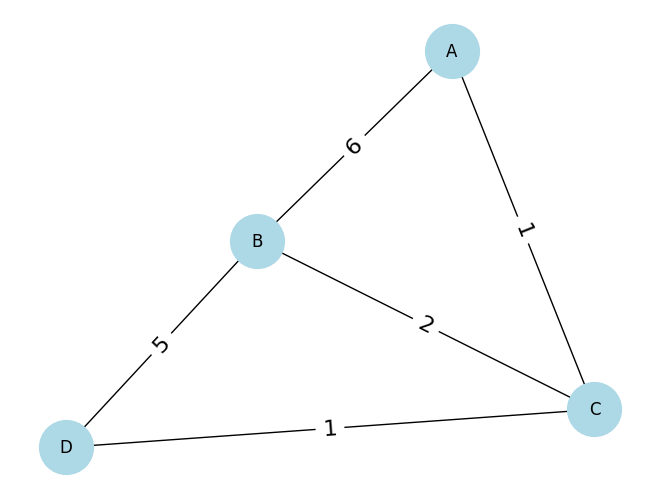

In [6]:
# convert graph into NetworkX style and display it
G_nx=convert_to_networkx(graph)
pos=nx.spring_layout(G_nx)
labels=nx.get_edge_attributes(G_nx,'weight')
nx.draw(G_nx,pos,with_labels=True,node_color='lightblue',node_size=1500)
_=nx.draw_networkx_edge_labels(G_nx,pos,edge_labels=labels,font_size=16)

<hr style="height:3px;background-color:lightgreen">

### Bonus: Social network with connection strength
Find the strongest friendship path between two persons in social networks

In [7]:
#Find path with strongest connections (inverse of weight)
# Convert friendship strength to distance (weaker = longer distance)
social_graph = {
    'Alice': [('Bob', 1/0.9), ('Charlie', 1/0.7)],  # Strong friendship = short distance
    'Bob': [('Alice', 1/0.9), ('Diana', 1/0.8)],
    'Charlie': [('Alice', 1/0.7), ('Eve', 1/0.6)],
    'Diana': [('Bob', 1/0.8), ('Frank', 1/0.5)],
    'Eve': [('Charlie', 1/0.6), ('Frank', 1/0.9)],
    'Frank': [('Diana', 1/0.5), ('Eve', 1/0.9)]
}

person1,person2='Frank','Bob'
distance_sg, previous_sg = dijkstra_with_path(social_graph, person1, person2)
path_sg=get_path(previous_sg,person1,person2)

# Sum the actual friendship strengths along the path
total_strength = 0
edge_count = len(path_sg) - 1

for i in range(len(path_sg) - 1):
    person_a = path_sg[i]
    person_b = path_sg[i + 1]
    # Convert distance back to original strength
    # Find the edge strength between person_a and person_b
    edge_strength = None
    for neighbor, edge_distance in social_graph[person_a]:
        if neighbor == person_b:
            # Convert distance back to original strength
            edge_strength = 1 / edge_distance
            break

    if edge_strength is not None:
        total_strength += edge_strength

avg_strength = total_strength / edge_count
print(f'The strongest path from {person1} to {person2} is:\n{path_sg}')
print(f'The average strength is: {avg_strength}')

The strongest path from Frank to Bob is:
['Frank', 'Diana', 'Bob']
The average strength is: 0.65
